In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/simulated_data.csv')

In [4]:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

In [5]:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])
df['Weekday'] = df['Time Stamp'].dt.day_name()
df['Hour'] = df['Time Stamp'].dt.hour
weekday_counts = df['Weekday'].value_counts().sort_index()
print("Events per Weekday:\n", weekday_counts)

Events per Weekday:
 Weekday
Friday        560
Monday       1495
Saturday      154
Sunday         69
Thursday      522
Tuesday       590
Wednesday     556
Name: count, dtype: int64


In [6]:
office_hours = df[(df['Hour'] >= 9) & (df['Hour'] < 18)]
non_office_hours = df[~((df['Hour'] >= 9) & (df['Hour'] < 18))]
print(f"{len(office_hours)} events occurred during office hours")
print(f"{len(non_office_hours)} events occurred outside office hours")

3520 events occurred during office hours
426 events occurred outside office hours


/var/folders/01/sh43b4vd1tjfw2h5rdl1x2r80000gn/T/ipykernel_49754/2398641270.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_counts = df.groupby(['Weekday', 'Hour']).size().reset_index(name='Event Count')


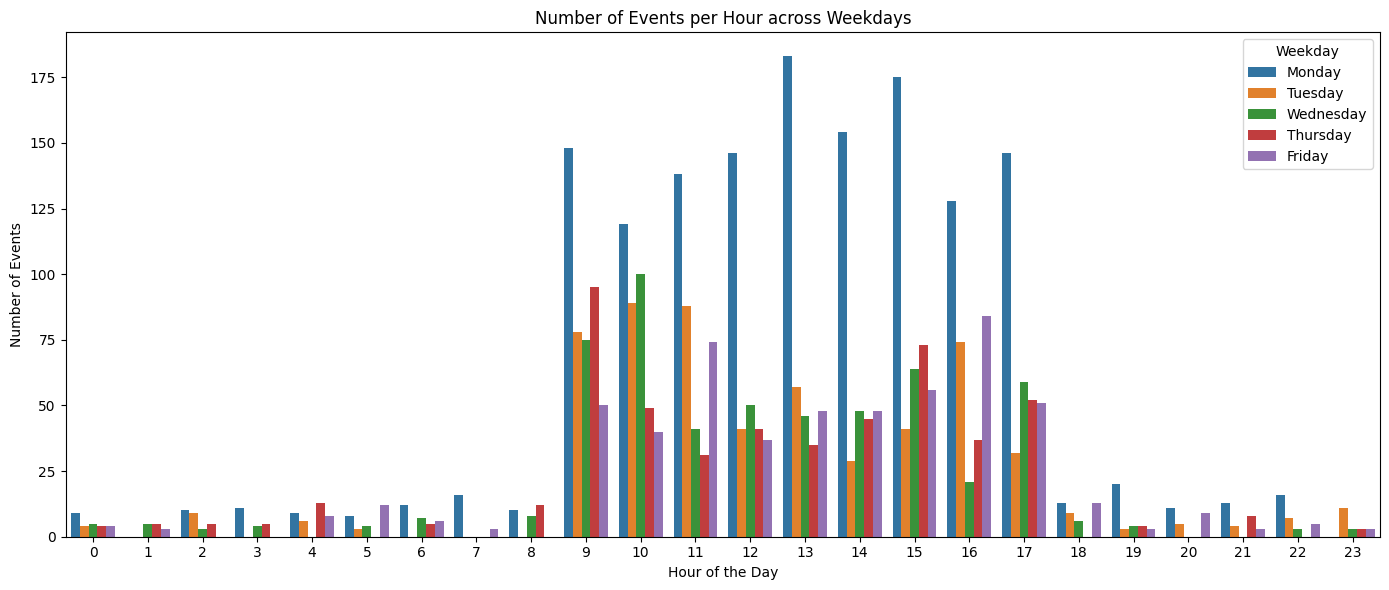

In [7]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)
hourly_counts = df.groupby(['Weekday', 'Hour']).size().reset_index(name='Event Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=hourly_counts, x='Hour', y='Event Count', hue='Weekday')
plt.title("Number of Events per Hour across Weekdays")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.legend(title='Weekday')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [8]:

print("\nTailgating Detection Proportion:")
print(df['Tailgating Detected'].value_counts(normalize=True))

print("\nHuman Feedback Agreement:")
agreement = (df['Tailgating Detected'] == df['Human Feedback']).mean()
print(f"{agreement:.2%} of the time human feedback agrees with the system")



Tailgating Detection Proportion:
Tailgating Detected
0    0.512671
1    0.487329
Name: proportion, dtype: float64

Human Feedback Agreement:
58.11% of the time human feedback agrees with the system


Found 959 open-close pairs
Duration stats - Min: 3.00s, Max: 177.00s, Avg: 21.70s


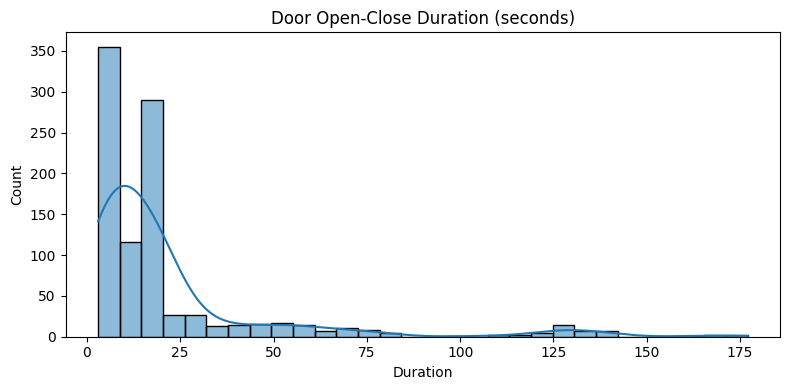

In [9]:
if 'Door Opened' in df.columns and 'Door Closed' in df.columns:
    opened_times = df[df['Door Opened'] == 1]['Time Stamp']
    closed_times = df[df['Door Closed'] == 1]['Time Stamp']

    # Get valid pairs of open-close (naive approach)
    durations = []
    open_index = 0
    for close_time in closed_times:
        while open_index < len(opened_times) and opened_times.iloc[open_index] < close_time:
            duration = (close_time - opened_times.iloc[open_index]).total_seconds()
            if 1 < duration < 180:  # Ignore implausible durations
                durations.append(duration)
                break
            open_index += 1

    if durations:
        print(f"Found {len(durations)} open-close pairs")
        print(f"Duration stats - Min: {min(durations):.2f}s, Max: {max(durations):.2f}s, Avg: {sum(durations)/len(durations):.2f}s")

        plt.figure(figsize=(8, 4))
        sns.histplot(durations, bins=30, kde=True)
        plt.title("Door Open-Close Duration (seconds)")
        plt.xlabel("Duration")
        plt.tight_layout()
        plt.show()
